In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Load datasets

In [10]:
customers_file = "data\Customers.csv"
products_file = "data\Products.csv"
transactions_file = "data\Transactions.csv"

In [11]:
customers_df = pd.read_csv(customers_file)
products_df = pd.read_csv(products_file)
transactions_df = pd.read_csv(transactions_file)


# Data Preprocessing

In [12]:
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"])
transactions_df["Month"] = transactions_df["TransactionDate"].dt.to_period("M")
transactions_df["Year"] = transactions_df["TransactionDate"].dt.year


# Merge datasets

In [13]:
merged_df = transactions_df.merge(customers_df, on="CustomerID", how="left")
merged_df = merged_df.merge(products_df, on="ProductID", how="left")


# Feature Engineering for Clustering

In [15]:
customer_features = merged_df.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum"
}).reset_index()

# Standardization

In [16]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop("CustomerID", axis=1))


# Elbow Method

C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

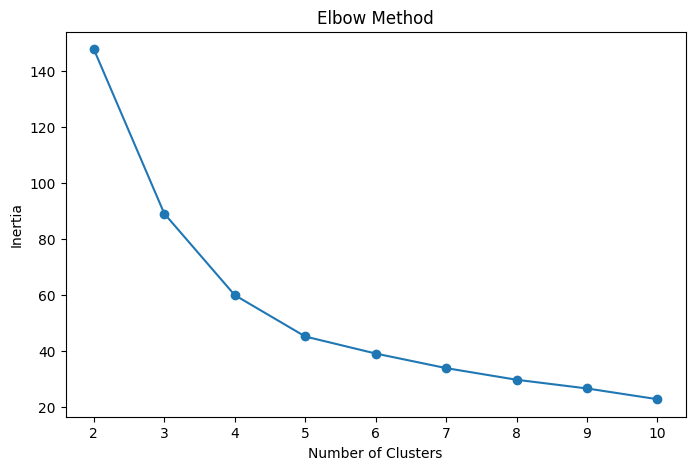

In [17]:
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [18]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features["Cluster"] = kmeans.fit_predict(scaled_features)


C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Silhouette Score and Davies-Bouldin Index

In [19]:
sil_score = silhouette_score(scaled_features, customer_features["Cluster"])
db_index = davies_bouldin_score(scaled_features, customer_features["Cluster"])


In [20]:
print(f"Silhouette Score: {sil_score}")
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.43092750662879303
Davies-Bouldin Index: 0.7529456905408806


# Visualize Clusters

C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\manis\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

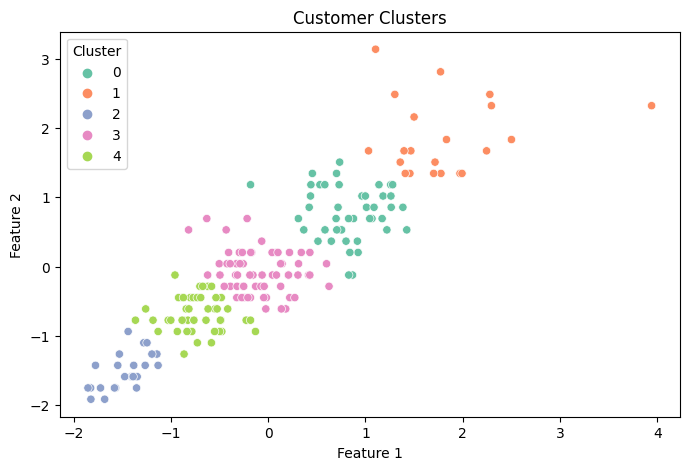

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=customer_features["Cluster"],
    palette="Set2"
)
plt.title("Customer Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

# Report Metrics

In [22]:
report = {
    "Number of Clusters": optimal_k,
    "Silhouette Score": sil_score,
    "Davies-Bouldin Index": db_index
}

In [23]:
print("Clustering Report:")
for key, value in report.items():
    print(f"{key}: {value}")

Clustering Report:
Number of Clusters: 5
Silhouette Score: 0.43092750662879303
Davies-Bouldin Index: 0.7529456905408806
